### PROJECT DESCRIPTION

This project is for a Banking institution. As a member of the data analytics team, my role involves creating tools that use the bank's operational data to help the business achieve its goals and projections.
For this project, I have been tasked to predict whether a client will subscribe to a term deposit (indicated by the variable "y" as "yes" or "n" as "no"). My task involves analyzing the dataset to assess trends and inisghts. Also, I am tasked to build a predictive model that determines the likelihood of a client subscribing to a term deposit based on the features provided in the dataset.



### HYPOTHESIS FORMULATION

**NULL HYPOTHESIS(H0) :** There is a significant relationship between a client job status and the likelihood of subscribing to a teram deposit
.

**ALTERNATE HYPOTHESIS(H1) :** There is no significant difference between a client job status and the likelihood of subscribing to a teram deposit

### BUSINESS QUESTIONS

1. What was the overview of churn for the period under review?
2. Which regions have the highest concentration of customers?
3. Which region had the highest churn rate?
4. Which category of customers churned the most?

### IMPORT PACKAGES

In [2]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pylab import rcParams

# Import pandas and numpy
import pandas as pd
import numpy as np

# Import statistical packages
from scipy.stats import ttest_ind
import scipy.stats as stats

# Import matplotlib and seaborn
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 4))
plt.style.use("fivethirtyeight")

# Import machine learning models
import sklearn
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.svm import SVC

# Import Pipeline, Scaler,Sampler, train_test_split, imputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from imblearn.combine import SMOTEENN 

# Import Encoders
from sklearn.preprocessing import LabelEncoder
import category_encoders as ce
from category_encoders import BinaryEncoder
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder

# import metrics
from sklearn.metrics import recall_score, mean_squared_log_error
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.model_selection import GridSearchCV, cross_val_predict, RandomizedSearchCV
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score

import os, pickle, joblib
%matplotlib inline

import warnings
warnings.filterwarnings('ignore' )
warnings.filterwarnings('ignore', message='The default value of numeric_only in DataFrame.corr is deprecated')

<Figure size 1000x400 with 0 Axes>

## IMPORT DATA

In [4]:
bank_add_full = pd.read_csv("C://Users//elvis_d//Downloads//data 1\\data\\bank-additional-full.csv",
                           delimiter = ";")

bank_add = pd.read_csv("C:\\Users\\elvis_d\\Downloads\\data 1\\data\\bank-additional.csv", 
                      delimiter = ";")

bank_full = pd.read_csv("C:\\Users\\elvis_d\\Downloads\\data 1\\data\\bank-full.csv", delimiter = ";")

bank = pd.read_csv("C:\\Users\\elvis_d\\Downloads\\data 1\\data\\bank.csv", delimiter = ";")

#Use bank-additional as test data for the project
bank_test = pd.read_csv("C:\\Users\\elvis_d\\Downloads\\data 1\\data\\bank-additional.csv", delimiter = ";")


## EXPLORATORY DATA ANALYSIS

In [3]:
# Open and read text file to get an understanding of the data

text_file = open("C:\\Users\\elvis_d\\Downloads\\data 1\\data\\bank-names.txt", "r")
for info in text_file:
    print(info)
text_file.close()

1. Relevant Information:



   The data is related with direct marketing campaigns of a banking institution. 

   The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, 

   in order to access if the product (bank term deposit) would be (or not) subscribed. 



   There are two datasets: 

      1) bank-full.csv with all examples, ordered by date (from May 2008 to November 2010).

      2) bank.csv with 10% of the examples (4521), randomly selected from bank-full.csv.

   The smallest dataset is provided to test more computationally demanding machine learning algorithms (e.g. SVM).



2. Number of Instances: 45211 for bank-full.csv (4521 for bank.csv)



3. Number of Attributes: 16 + output attribute.



4. Attribute information:



   Input variables:

   # bank client data:

   1 - age (numeric)

   2 - job : type of job (categorical: "admin.","unknown","unemployed","management","housemaid","entrepreneur","student",

         

In [4]:
# Randomly checking samples of bank_additonal_full data

pd.options.display.max_columns = None
bank_add_full.sample(5, random_state=1)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
35577,32,blue-collar,married,basic.9y,unknown,yes,yes,cellular,may,mon,114,1,999,0,nonexistent,-1.8,92.893,-46.2,1.244,5099.1,no
13950,33,blue-collar,single,basic.6y,unknown,yes,yes,cellular,jul,fri,103,2,999,0,nonexistent,1.4,93.918,-42.7,4.963,5228.1,no
29451,25,self-employed,divorced,university.degree,no,yes,no,cellular,apr,mon,227,5,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,yes
32295,34,blue-collar,single,high.school,no,yes,no,cellular,may,fri,56,1,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
27477,53,technician,married,professional.course,no,yes,no,cellular,nov,fri,11,7,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,no


In [5]:
# Check shape of bank-additional-full data

print("The Bank-Additional-Full data contains ",bank_add_full.shape[0], "rows and ",  
      bank_add_full.shape[1], "colums" )

The Bank-Additional-Full data contains  41188 rows and  21 colums


In [6]:
# Check the basic info in the bank-additional-full data

bank_add_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [7]:
# Check for null values in bank-additional-full data

bank_add_full.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

There are no null values in the data and datatypes are floats, integers and objects

In [8]:
# Check for duplicated values in the bank-additional-full data

bank_add_full.duplicated().sum()

12

There are 12 duplicates in the bank-additional-full data

In [9]:
# Checking for the duplicated entries

bank_add_full[bank_add_full.duplicated()]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
1266,39,blue-collar,married,basic.6y,no,no,no,telephone,may,thu,124,1,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
12261,36,retired,married,unknown,no,no,no,telephone,jul,thu,88,1,999,0,nonexistent,1.4,93.918,-42.7,4.966,5228.1,no
14234,27,technician,single,professional.course,no,no,no,cellular,jul,mon,331,2,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
16956,47,technician,divorced,high.school,no,yes,no,cellular,jul,thu,43,3,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
18465,32,technician,single,professional.course,no,yes,no,cellular,jul,thu,128,1,999,0,nonexistent,1.4,93.918,-42.7,4.968,5228.1,no
20216,55,services,married,high.school,unknown,no,no,cellular,aug,mon,33,1,999,0,nonexistent,1.4,93.444,-36.1,4.965,5228.1,no
20534,41,technician,married,professional.course,no,yes,no,cellular,aug,tue,127,1,999,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,no
25217,39,admin.,married,university.degree,no,no,no,cellular,nov,tue,123,2,999,0,nonexistent,-0.1,93.200,-42.0,4.153,5195.8,no
28477,24,services,single,high.school,no,yes,no,cellular,apr,tue,114,1,999,0,nonexistent,-1.8,93.075,-47.1,1.423,5099.1,no
32516,35,admin.,married,university.degree,no,yes,no,cellular,may,fri,348,4,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no


In [10]:
# Randomly checking samples of bank_add data

pd.options.display.max_columns = None
bank_add.sample(5, random_state=1)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
3291,54,blue-collar,married,basic.9y,no,yes,yes,cellular,nov,wed,101,1,999,0,nonexistent,-3.4,92.649,-30.1,0.719,5017.5,no
3978,50,management,single,university.degree,no,yes,no,cellular,nov,tue,600,2,999,1,failure,-0.1,93.200,-42.0,4.153,5195.8,no
3707,60,retired,married,high.school,no,no,no,cellular,may,thu,181,3,6,1,success,-1.8,93.876,-40.0,0.699,5008.7,yes
3239,31,unemployed,single,high.school,no,no,no,cellular,may,thu,339,2,999,0,nonexistent,-1.8,93.876,-40.0,0.692,5008.7,no
2934,30,services,married,high.school,no,yes,yes,telephone,may,fri,114,2,999,0,nonexistent,1.1,93.994,-36.4,4.864,5191.0,no


In [11]:
# Check shape of bank-add data

print("The Bank-Add data contains ",bank_add.shape[0], "rows and ",  
      bank_add.shape[1], "colums" )

The Bank-Add data contains  4119 rows and  21 colums


In [12]:
# Check the basic info in the bank-add data

bank_add.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4119 entries, 0 to 4118
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             4119 non-null   int64  
 1   job             4119 non-null   object 
 2   marital         4119 non-null   object 
 3   education       4119 non-null   object 
 4   default         4119 non-null   object 
 5   housing         4119 non-null   object 
 6   loan            4119 non-null   object 
 7   contact         4119 non-null   object 
 8   month           4119 non-null   object 
 9   day_of_week     4119 non-null   object 
 10  duration        4119 non-null   int64  
 11  campaign        4119 non-null   int64  
 12  pdays           4119 non-null   int64  
 13  previous        4119 non-null   int64  
 14  poutcome        4119 non-null   object 
 15  emp.var.rate    4119 non-null   float64
 16  cons.price.idx  4119 non-null   float64
 17  cons.conf.idx   4119 non-null   f

In [13]:
# # Check for duplicated values in the bank-add data

bank_add.duplicated().sum()

0

There are no duplicated values in the data

In [14]:
# # Check shape of bank full data

print("The Bank Full data contains ",bank_full.shape[0], "rows and ",  
      bank_full.shape[1], "colums" )

The Bank Full data contains  45211 rows and  17 colums


In [15]:
# Randomly checking samples of bank_full data

pd.options.display.max_columns = None
bank_full.sample(5, random_state=1)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
3610,42,blue-collar,married,primary,no,2519,yes,no,unknown,15,may,262,4,-1,0,unknown,no
11677,37,technician,married,secondary,no,2209,no,no,unknown,20,jun,167,2,-1,0,unknown,no
33018,32,admin.,married,secondary,no,923,yes,no,cellular,17,apr,819,4,-1,0,unknown,no
44323,53,blue-collar,married,primary,no,306,no,no,cellular,28,jul,388,3,181,1,success,yes
8119,32,technician,single,tertiary,no,257,yes,no,unknown,2,jun,183,5,-1,0,unknown,no


In [16]:
# Check the basic info in the bank-full data

bank_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [17]:
# # Check for duplicated values in the bank-full data

bank_full.duplicated().sum()

0

There are no duplicates in the bank-full data

In [18]:
# # Check shape of bank data

print("The Bank data contains ",bank.shape[0], "rows and ",  
      bank.shape[1], "colums" )

The Bank data contains  4521 rows and  17 colums


In [19]:
# Randomly checking samples of bank data

pd.options.display.max_columns = None
bank.sample(5, random_state=1)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
1236,32,admin.,single,secondary,no,116,no,yes,cellular,16,jul,255,2,-1,0,unknown,no
2183,46,blue-collar,married,primary,no,174,no,yes,cellular,15,jul,90,1,-1,0,unknown,no
1573,50,blue-collar,married,secondary,no,372,yes,no,telephone,11,may,21,1,-1,0,unknown,no
4489,45,management,married,tertiary,no,6945,no,no,cellular,5,aug,131,5,356,3,failure,no
1801,49,blue-collar,married,secondary,no,579,yes,no,unknown,28,may,396,1,-1,0,unknown,no


In [20]:
# Check the basic info in the bankdata

bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [21]:
# # Check for duplicated values in the bank data

bank.duplicated().sum()

0

There are no duplicates in the Bank data

## UNIVARIATE ANALYSIS

The univariate analysis is done using the Bank-Additional-Full dataset

In [22]:
bank_full.head(3)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no


no     36548
yes     4640
Name: y, dtype: int64


Text(0.5, 0, 'term deposit')

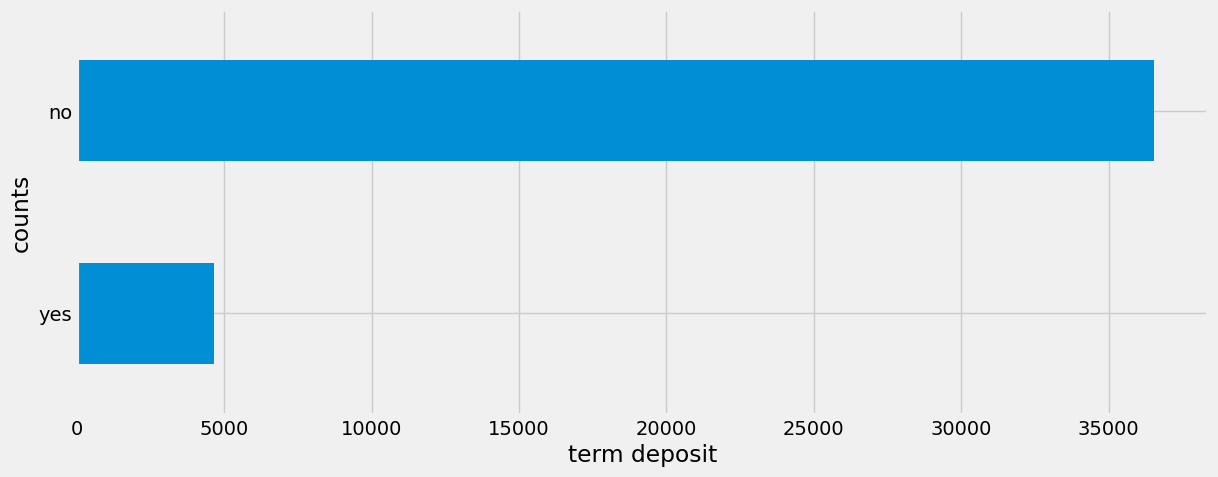

In [23]:
# Check value count of y, that is clients that have subscribed to a term deposit(predicting feature)

print(bank_add_full['y'].value_counts())

plt.figure(figsize=(13,5))
bank_add_full['y'].value_counts().plot(kind='barh')
plt.gca().invert_yaxis()
plt.ylabel('counts')
plt.xlabel('term deposit')

admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64


Text(0.5, 0, 'JOB')

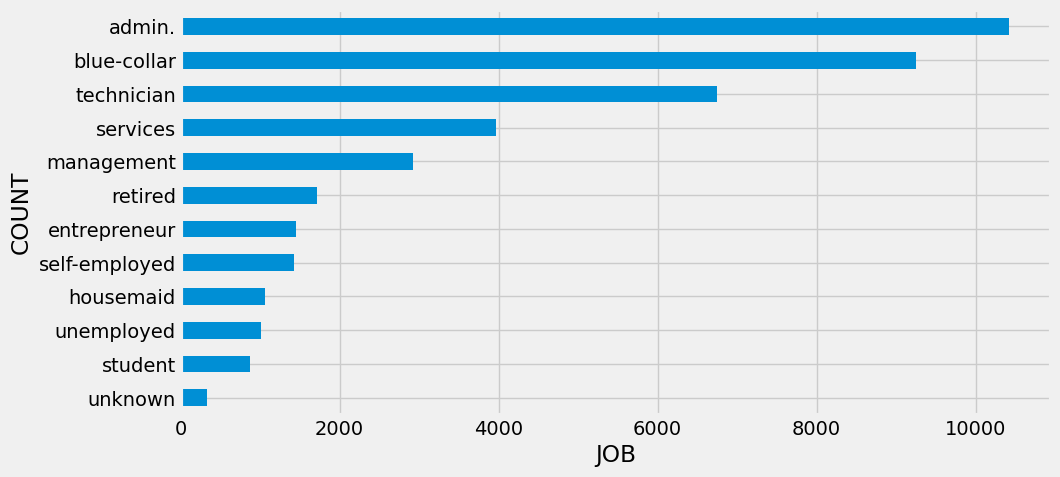

In [24]:
# Check  value counts of jobs of clients

print(bank_add_full['job'].value_counts())

plt.figure(figsize=(10,5))
bank_add_full['job'].value_counts().plot(kind='barh')
plt.gca().invert_yaxis()
plt.ylabel('COUNT')
plt.xlabel('JOB')

married     24928
single      11568
divorced     4612
unknown        80
Name: marital, dtype: int64


Text(0.5, 0, 'MARITAL STATUS')

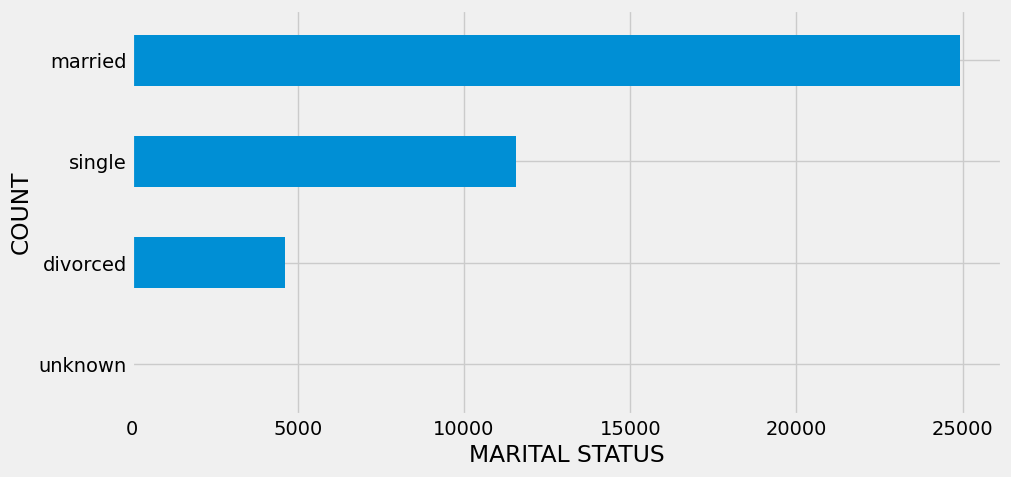

In [25]:
# Check  value counts of marital status of clients

print(bank_add_full['marital'].value_counts())

plt.figure(figsize=(10,5))
bank_add_full['marital'].value_counts().plot(kind='barh')
plt.gca().invert_yaxis()
plt.ylabel('COUNT')
plt.xlabel('MARITAL STATUS')

university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64


Text(0.5, 0, 'EDUCATION LEVEL')

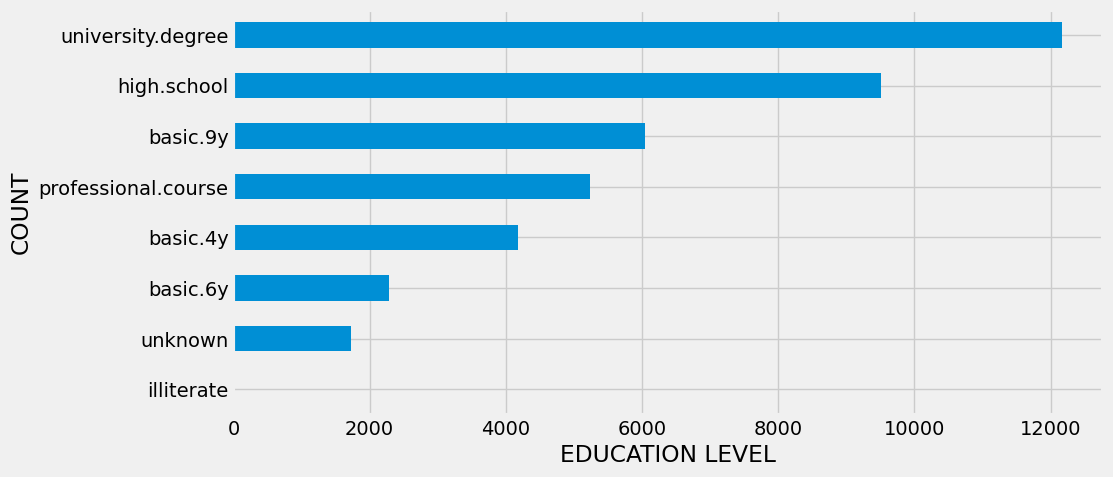

In [26]:
# Check  value counts of educational status of clients

print(bank_add_full['education'].value_counts())

plt.figure(figsize=(10,5))
bank_add_full['education'].value_counts().plot(kind='barh')
plt.gca().invert_yaxis()
plt.ylabel('COUNT')
plt.xlabel('EDUCATION LEVEL')

no         32588
unknown     8597
yes            3
Name: default, dtype: int64


Text(0.5, 0, 'CREDIT DEFAULT')

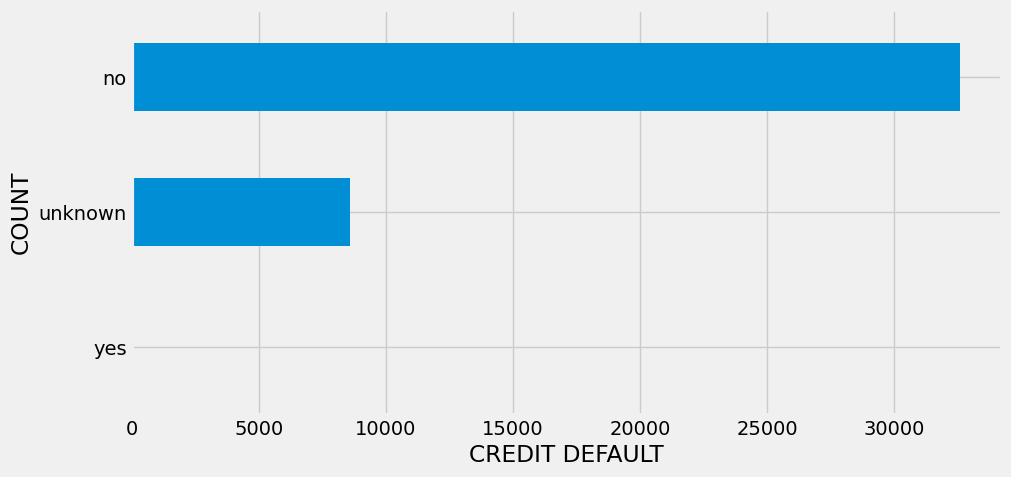

In [27]:
# Check  value counts of clients who have defaulted credits

print(bank_add_full['default'].value_counts())

plt.figure(figsize=(10,5))
bank_add_full['default'].value_counts().plot(kind='barh')
plt.gca().invert_yaxis()
plt.ylabel('COUNT')
plt.xlabel('CREDIT DEFAULT')

yes        21576
no         18622
unknown      990
Name: housing, dtype: int64


Text(0.5, 0, 'HOSUSING LOANS')

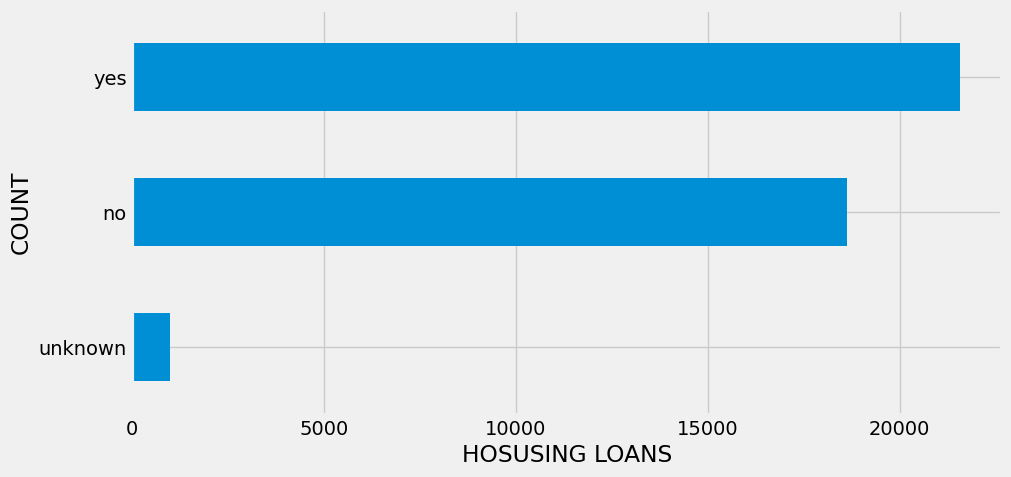

In [28]:
# Check  value counts of clients who have housing loans

print(bank_add_full['housing'].value_counts())

plt.figure(figsize=(10,5))
bank_add_full['housing'].value_counts().plot(kind='barh')
plt.gca().invert_yaxis()
plt.ylabel('COUNT')
plt.xlabel('HOSUSING LOANS')

no         33950
yes         6248
unknown      990
Name: loan, dtype: int64


Text(0.5, 0, 'PESONAL LOANS')

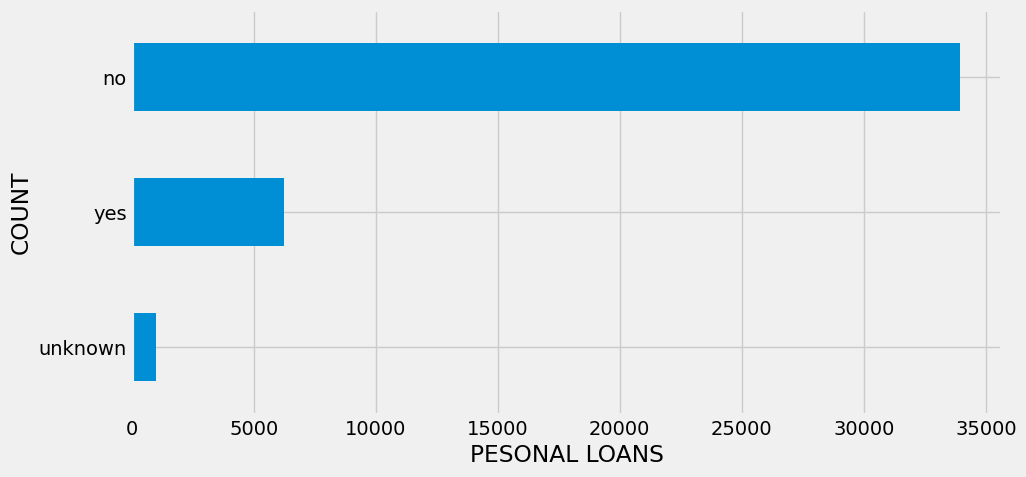

In [29]:
# Check  value counts of clients who have personal loans

print(bank_add_full['loan'].value_counts())

plt.figure(figsize=(10,5))
bank_add_full['loan'].value_counts().plot(kind='barh')
plt.gca().invert_yaxis()
plt.ylabel('COUNT')
plt.xlabel('PESONAL LOANS')

nonexistent    35563
failure         4252
success         1373
Name: poutcome, dtype: int64


Text(0.5, 0, 'PREVIOUS CAMPAIGN OUTCOME')

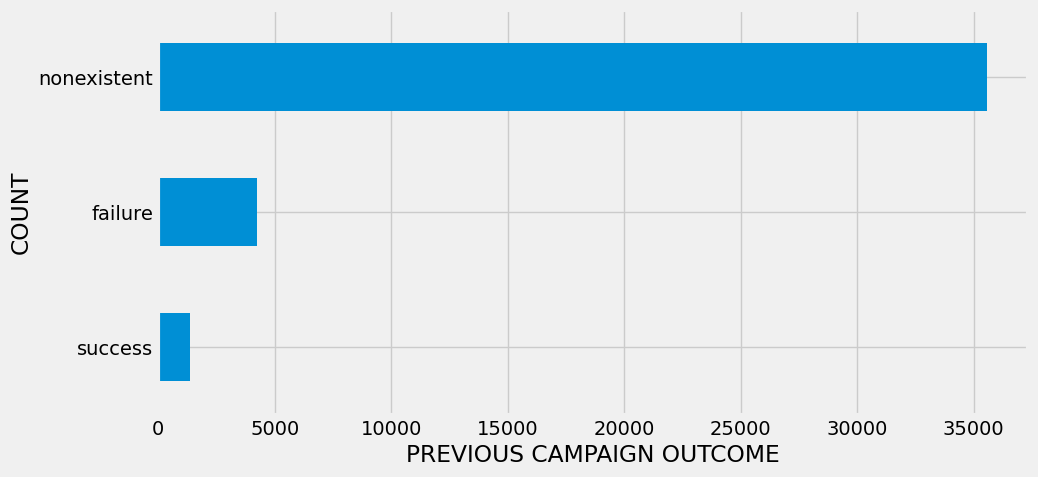

In [30]:
# Check  value counts of the outcome of the previous campaign

print(bank_add_full['poutcome'].value_counts())

plt.figure(figsize=(10,5))
bank_add_full['poutcome'].value_counts().plot(kind='barh')
plt.gca().invert_yaxis()
plt.ylabel('COUNT')
plt.xlabel('PREVIOUS CAMPAIGN OUTCOME')

### MULTIVARIATE ANALYSIS
The multivariate analysis was done using the Bank-Additional-Full

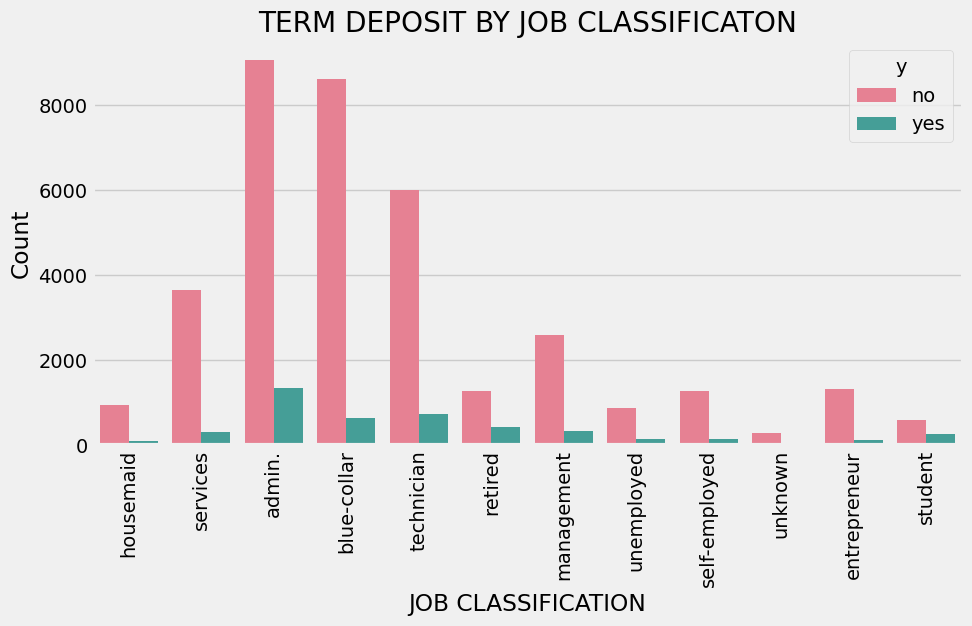

In [31]:
# Analyzing term deposits by job classification of clients

plt.figure(figsize=(10,5))

sns.countplot(x='job', hue='y', data=bank_add_full, palette='husl')
plt.title('TERM DEPOSIT BY JOB CLASSIFICATON')
plt.xlabel('JOB CLASSIFICATION')
plt.ylabel('Count')
plt.xticks(rotation=90)

plt.show()

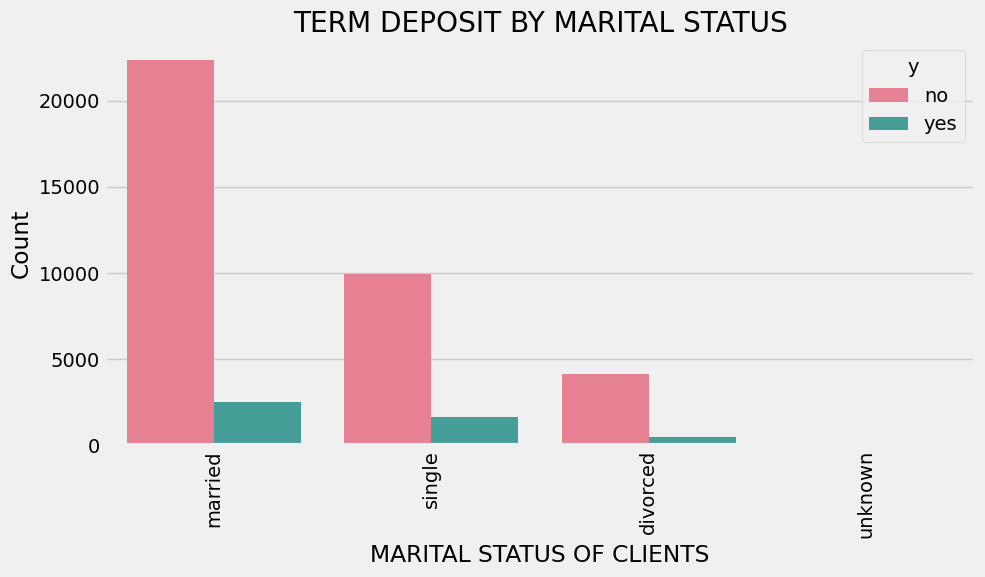

In [32]:
# Analyzing term deposits by marital status of clients

plt.figure(figsize=(10,5))

sns.countplot(x='marital', hue='y', data=bank_add_full, palette='husl')
plt.title('TERM DEPOSIT BY MARITAL STATUS')
plt.xlabel('MARITAL STATUS OF CLIENTS')
plt.ylabel('Count')
plt.xticks(rotation=90)

plt.show()

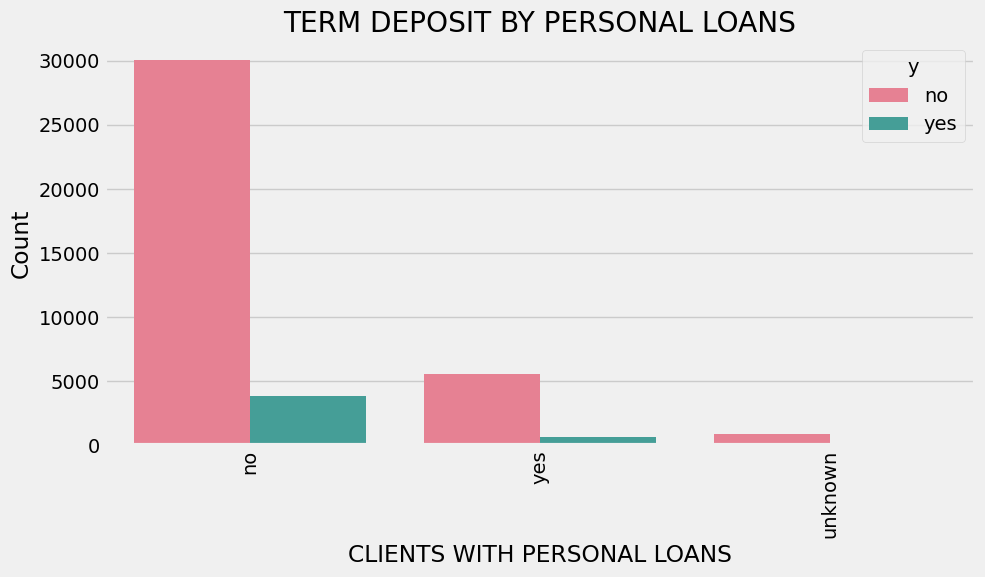

In [33]:
# Analyzing term deposits by clients who have personal loans

plt.figure(figsize=(10,5))

sns.countplot(x='loan', hue='y', data=bank_add_full, palette='husl')
plt.title('TERM DEPOSIT BY PERSONAL LOANS')
plt.xlabel('CLIENTS WITH PERSONAL LOANS')
plt.ylabel('Count')
plt.xticks(rotation=90)

plt.show()

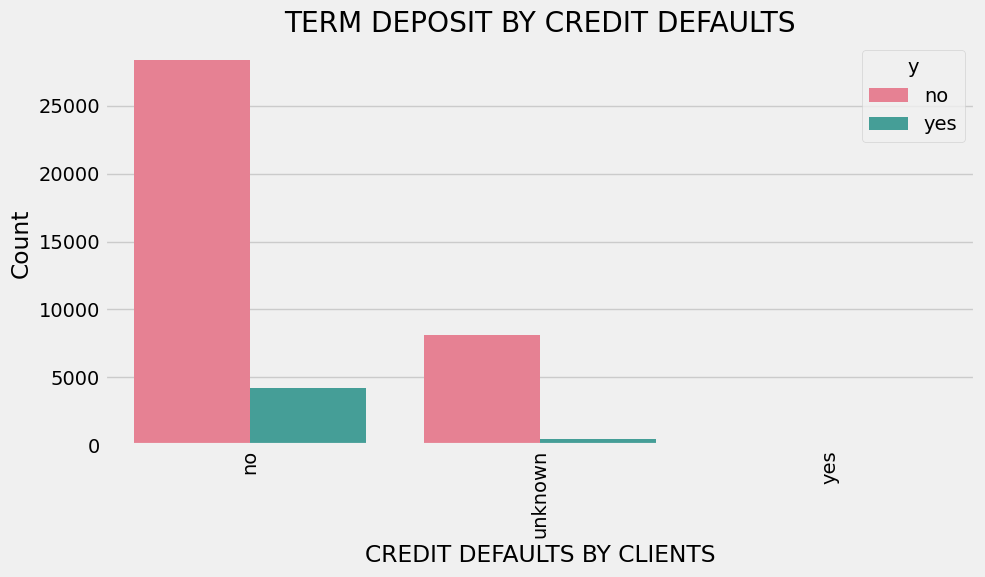

In [34]:
# Analyzing term deposits by clients who have credit defaults

plt.figure(figsize=(10,5))

sns.countplot(x='default', hue='y', data=bank_add_full, palette='husl')
plt.title('TERM DEPOSIT BY CREDIT DEFAULTS')
plt.xlabel('CREDIT DEFAULTS BY CLIENTS')
plt.ylabel('Count')
plt.xticks(rotation=90)

plt.show()

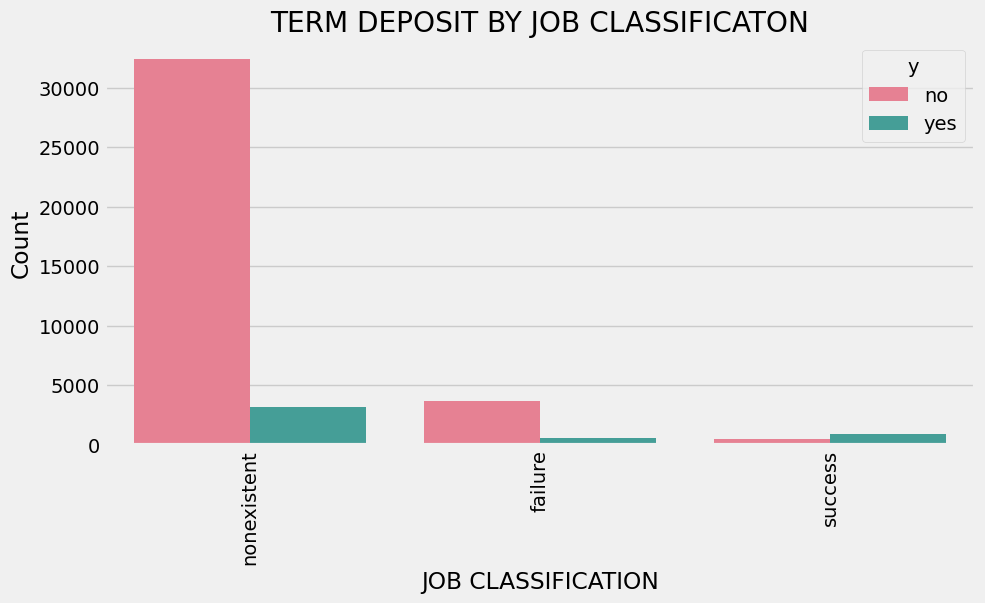

In [35]:
# Analyzing term deposits by job classification of clients

plt.figure(figsize=(10,5))

sns.countplot(x='poutcome', hue='y', data=bank_add_full, palette='husl')
plt.title('TERM DEPOSIT BY JOB CLASSIFICATON')
plt.xlabel('JOB CLASSIFICATION')
plt.ylabel('Count')
plt.xticks(rotation=90)

plt.show()

### Checking the Test data

In [36]:
# Check first 5 rows of test data

bank_test.head(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,487,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,346,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,227,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,17,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,58,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


In [37]:
# Check for duplicates in test data

bank_test.duplicated().sum()

0

There are no duplicates in the test data

In [38]:
# Check basic info of test data

bank_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4119 entries, 0 to 4118
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             4119 non-null   int64  
 1   job             4119 non-null   object 
 2   marital         4119 non-null   object 
 3   education       4119 non-null   object 
 4   default         4119 non-null   object 
 5   housing         4119 non-null   object 
 6   loan            4119 non-null   object 
 7   contact         4119 non-null   object 
 8   month           4119 non-null   object 
 9   day_of_week     4119 non-null   object 
 10  duration        4119 non-null   int64  
 11  campaign        4119 non-null   int64  
 12  pdays           4119 non-null   int64  
 13  previous        4119 non-null   int64  
 14  poutcome        4119 non-null   object 
 15  emp.var.rate    4119 non-null   float64
 16  cons.price.idx  4119 non-null   float64
 17  cons.conf.idx   4119 non-null   f

There are no null values in the test data

## BUSINESS QUESTIONS

## HYPTHESIS TESTING

## FINDING AND INSIGHTS

1. From the data, a huge majority of clients have not subscribed to term deposits, with such clients amounting to 36548 individuals. Only 4640 clients have subscribed to a term deposit.

2. Clients of the bank fall into the following top ten job categories.
- Admininistration           10422
- Blue-collar                9254
- Technician                 6743
- Services                   3969
- Management                 2924
- Retired                    1720
- Entrepreneur               1456
- Self-employment            1421
- Housemaid                  1060
- Unemployed                 1014

3. 24928 among the bank client's are married, 11568 are single, 4612 are divorced and 80 are unknown.

4. The top five (5) education level of our clients are as follows
- university.degree      12168
- high.school             9515
- basic.9y                6045
- professional.course     5243
- basic.4y                4176

5. With regards to credit defaults, 32588 clents are behind on making payments on loans, 3 clients have no defaults and there are 8697 unknown defaults.


6. 21576 clients have received housing loans from the bank, 18622 clients do not have housing loans ad there 990 clients who have not specified if they have a housing loan from the bank or not.

7. Also, 33950 of our clients have not received personal loans from the bank. 6248 have received personal loans and 990 clients have not specified to receiving personal loans from us.

8. After the previous campaign, we assessed that 1373 clients were successfully persuaded to subscribe to a  new term deposit. 4252 clients objected to opening a new term deposit and 35563 clients did not give definite answers on opening a new term deposit or not.

9. Clients working in administration were the clients who did not suscribe to new term limit the most. Nonetheless, the reamining clients in Administration jobs subscribed for new term limits than clients in other professions.

10. Married clients mostly did not subscribe to new term deposits. However, the married clients who subscribed to the new term limits were the highest among other marital categories who subscribed most to new term deposits.

11. Clients who had no personal loans lessly subscribe to new term limits. However, clients who had personal loans and subscribed to new term deposits werethe highest among other categories.

12. Clients who have defaulted in credits lessly subscribed to new term deposits. However, defaulted clients who suscribed to new term deposits were the highest among other categories.

## DATA CLEANING

In this section :

- Check the unique categorical values of columns to have an overview of how to clean categorical data
- Columns that are irrelevant to feature engineering and machine learning model training will be dropped.
- Columns and values will be properly named to a standard form.
- Duplicated values will be removed

### Check for the unique values of categorical columns

In [39]:
# check the categorical values of job

bank_add_full["job"].unique()

array(['housemaid', 'services', 'admin.', 'blue-collar', 'technician',
       'retired', 'management', 'unemployed', 'self-employed', 'unknown',
       'entrepreneur', 'student'], dtype=object)

In [40]:
# check the unique categorical values of marital

bank_add_full["marital"].unique()

array(['married', 'single', 'divorced', 'unknown'], dtype=object)

In [41]:
# check the unique categorical values of education

bank_add_full["education"].unique()

array(['basic.4y', 'high.school', 'basic.6y', 'basic.9y',
       'professional.course', 'unknown', 'university.degree',
       'illiterate'], dtype=object)

In [42]:
# check the unique categorical values of default

bank_add_full["default"].unique()

array(['no', 'unknown', 'yes'], dtype=object)

In [43]:
# check the unique categorical values of housing

bank_add_full["housing"].unique()

array(['no', 'yes', 'unknown'], dtype=object)

In [44]:
# check the unique categorical values of loan

bank_add_full["loan"].unique()

array(['no', 'yes', 'unknown'], dtype=object)

In [45]:
# check the unique categorical values of contact

bank_add_full["contact"].unique()

array(['telephone', 'cellular'], dtype=object)

In [46]:
# check the unique categorical values of month

bank_add_full["month"].unique()

array(['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'mar', 'apr',
       'sep'], dtype=object)

In [47]:
# check the unique categorical values of day of week

bank_add_full["day_of_week"].unique()

array(['mon', 'tue', 'wed', 'thu', 'fri'], dtype=object)

In [48]:
# check the unique categorical values of term deposit

bank_add_full["y"].unique()

array(['no', 'yes'], dtype=object)

### Rename column and values to a standard form

Column and values are renamed for bank_add_full and bank_test data

In [5]:
# # Rename column "y" to read "term_deposit"

bank_add_full.rename(columns={"y" : "term_deposit"}, inplace=True)

bank_test.rename(columns={"y" : "term_deposit"}, inplace=True)

# Rename admin. in job column to administration
bank_add_full.replace(to_replace="admin.", value="administration", inplace=True)

bank_test.replace(to_replace="admin.", value="administration", inplace=True)

#Rename days of the week
bank_add_full.replace(["mon", "tue", "wed", "thu", "fri"], 
                      ["monday", "tuesday", "wednesday", "thursday", "friday"], inplace=True)

bank_test.replace(["mon", "tue", "wed", "thu", "fri"], 
                      ["monday", "tuesday", "wednesday", "thursday", "friday"], inplace=True)

#Rename values of job 
bank_add_full.replace(["basic.4y", "high.school", "basic.6y", "basic.9y",
                            "professional.course", "university.degree"], 
                              ["lower basic", "high school", "mid basic", "upper basic", 
                               "professional course", "university degree"], inplace=True)

bank_test.replace(["basic.4y", "high.school", "basic.6y", "basic.9y",
                            "professional.course", "university.degree"], 
                              ["lower basic", "high school", "mid basic", "upper basic", 
                               "professional course", "university degree"], inplace=True)

#Rename months
bank_add_full.replace(["jun", "jul", "aug", "oct", "nov", "dec", "mar", "apr","sep"],
                     ["june", "july", "august", "october", "november", "december", "march", 
                      "april", "september"], inplace=True)

bank_test.replace(["jun", "jul", "aug", "oct", "nov", "dec", "mar", "apr","sep"],
                     ["june", "july", "august", "october", "november", "december", "march", 
                      "april", "september"], inplace=True)
       

### Remove duplicates

Column and values are renamed for bank_add_full and bank_test data

In [6]:
bank_add_full.drop_duplicates(subset=None, keep="first", inplace=True)

bank_test.drop_duplicates(subset=None, keep="first", inplace=True)


In [7]:
bank_add_full.duplicated().sum()

bank_test.duplicated().sum()

0

It can be seen there are no longer duplicates in the data

### Removing irrelevant columns

Column and values are renamed for bank_add_full and bank_test data

In [8]:
bank_add_full.drop(["emp.var.rate", "cons.price.idx", "cons.conf.idx", "euribor3m", "nr.employed"],
                   axis=1, inplace=True)

bank_test.drop(["emp.var.rate", "cons.price.idx", "cons.conf.idx", "euribor3m", "nr.employed"],
                   axis=1, inplace=True)

### Check cleaned data

In [9]:
# random sample of data

pd.options.display.max_columns = None
bank_add_full.sample(5, random_state=2)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,term_deposit
20472,44,services,married,high school,unknown,yes,no,cellular,august,tuesday,157,3,999,0,nonexistent,no
18411,48,entrepreneur,married,university degree,no,yes,no,cellular,july,thursday,207,1,999,0,nonexistent,no
5693,51,services,single,high school,unknown,no,no,telephone,may,monday,45,4,999,0,nonexistent,no
30318,29,technician,single,professional course,no,no,no,cellular,april,thursday,96,2,2,1,success,no
33418,33,blue-collar,married,upper basic,no,yes,yes,cellular,may,tuesday,31,4,999,0,nonexistent,no


In [10]:
# random sample of test data

pd.options.display.max_columns = None
bank_test.sample(5, random_state=2)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,term_deposit
1022,27,administration,single,university degree,no,no,no,cellular,may,monday,409,1,1,1,success,no
2124,33,self-employed,single,lower basic,no,yes,no,telephone,may,friday,742,2,999,0,nonexistent,no
1723,43,blue-collar,married,lower basic,unknown,yes,no,telephone,june,wednesday,173,1,999,0,nonexistent,no
585,30,technician,married,high school,no,yes,no,telephone,may,thursday,212,6,999,0,nonexistent,no
2660,43,blue-collar,married,upper basic,unknown,yes,no,cellular,may,tuesday,545,1,999,0,nonexistent,no



## FEATURE ENGINEERING AND PROCESSING
In this section:

- The Bank-Additional-Full data will be used for feature engineering
- New features will be created to help in training of machine learning models.
- We will create a feature that will use the number of contacts in the new campaign and the number of contacts in the previous campaign to ascertain the difference in number of contacts to each client which has a posibility of influencing a client's decision to subscribe to a new term deposit
- The data will be splitted in training and validation sets to train and validate machine learning models 

###  Feature Creation

In [11]:
# Creating a new column for diference in the number of contacts between the current and previous campaigns

bank_add_full["campaign_diff"] = bank_add_full["campaign"] - bank_add_full["previous"]
bank_test["campaign_diff"] = bank_test["campaign"] - bank_test["previous"]

In [12]:
# checking the new data randomly

pd.options.display.max_columns = None
bank_add_full.sample(5, random_state=9)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,term_deposit,campaign_diff
31921,33,blue-collar,married,upper basic,unknown,yes,no,cellular,may,thursday,580,3,999,0,nonexistent,no,3
19309,57,blue-collar,married,unknown,unknown,yes,no,cellular,august,wednesday,376,2,999,0,nonexistent,no,2
38654,30,administration,single,university degree,no,yes,no,cellular,november,tuesday,402,1,999,0,nonexistent,no,1
10814,39,services,single,high school,no,yes,no,telephone,june,wednesday,205,3,999,0,nonexistent,no,3
21757,40,administration,divorced,university degree,unknown,yes,no,cellular,august,tuesday,1200,2,999,0,nonexistent,no,2


### Feature Engineering

In [13]:
# Create x and y for data splitting

y = bank_add_full["term_deposit"]
x = bank_add_full.drop(columns=["term_deposit"], axis=1)

# Create test data
bank_y = bank_test["term_deposit"]
bank_test = bank_test.drop(columns=["term_deposit"], axis=1)


#print shape of x,y and test data
print(x.shape)
print(y.shape)
print(bank_test.shape)

(41176, 16)
(41176,)
(4119, 16)


In [14]:
# Split data into train and test data

X_train,X_val,y_train,y_val = train_test_split(x,y, test_size = 0.5,random_state=1)

#print shape of trai data
print(X_train.shape)
print(y_train.shape)

# Print shae of test data
print(X_val.shape)
print(y_val.shape)

(20588, 16)
(20588,)
(20588, 16)
(20588,)


In [15]:
# # Split x_train into training and validation sets

# X_train,X_val,y_train,y_val = train_test_split(X_train,y_train, test_size = 0.3, random_state=5)

In [16]:
# Check the shape of training, testing and validation sets

print("train")
print(X_train.shape)
print(y_train.shape)
#print("+"*7)
# print("test")
# print(X_test.shape)
# print(y_test.shape)
print("+"*7)
print("validation")
print(X_val.shape)
print(y_val.shape)

train
(20588, 16)
(20588,)
+++++++
validation
(20588, 16)
(20588,)


In [17]:
# Use Standard Scaler to standardize numeric values

num_cols = ["age", "duration", "campaign", "pdays", "previous", "campaign_diff"]

In [18]:
# Define scaler

scaler = StandardScaler()

In [19]:
# Fit X_train with scaler

X_train[num_cols] = scaler.fit_transform(X_train[num_cols])

In [20]:
# Fit X_test with scaler

#X_test[num_cols] = scaler.transform(X_test[num_cols])

In [21]:
# # Fit test data with scaler

bank_test[num_cols] = scaler.transform(bank_test[num_cols])

In [22]:
# Fit validation data(X_val) with scaler

X_val[num_cols] = scaler.transform(X_val[num_cols])

In [23]:
# Define encoder and use it to encode categorical features

encoder = LabelEncoder()

In [24]:
# Fit tenure with encoder in X_train

X_train["job"] = encoder.fit_transform(X_train["job"])
X_train["marital"] = encoder.fit_transform(X_train["marital"])
X_train["education"] = encoder.fit_transform(X_train["education"])
X_train["default"] = encoder.fit_transform(X_train["default"])
X_train["housing"] = encoder.fit_transform(X_train["housing"])
X_train["loan"] = encoder.fit_transform(X_train["loan"])
X_train["contact"] = encoder.fit_transform(X_train["contact"])
X_train["month"] = encoder.fit_transform(X_train["month"])
X_train["day_of_week"] = encoder.fit_transform(X_train["day_of_week"])
X_train["poutcome"] = encoder.fit_transform(X_train["poutcome"])

In [25]:
# Fit tenure with encoder in X_val


X_val["job"] = encoder.fit_transform(X_val["job"])
X_val["marital"] = encoder.fit_transform(X_val["marital"])
X_val["education"] = encoder.fit_transform(X_val["education"])
X_val["default"] = encoder.fit_transform(X_val["default"])
X_val["housing"] = encoder.fit_transform(X_val["housing"])
X_val["loan"] = encoder.fit_transform(X_val["loan"])
X_val["contact"] = encoder.fit_transform(X_val["contact"])
X_val["month"] = encoder.fit_transform(X_val["month"])
X_val["day_of_week"] = encoder.fit_transform(X_val["day_of_week"])
X_val["poutcome"] = encoder.fit_transform(X_val["poutcome"])

In [26]:
# Fit tenure with encoder in X_test


# X_test["job"] = encoder.fit_transform(X_test["job"])
# X_test["marital"] = encoder.fit_transform(X_test["marital"])
# X_test["education"] = encoder.fit_transform(X_test["education"])
# X_test["default"] = encoder.fit_transform(X_test["default"])
# X_test["housing"] = encoder.fit_transform(X_test["housing"])
# X_test["loan"] = encoder.fit_transform(X_test["loan"])
# X_test["contact"] = encoder.fit_transform(X_test["contact"])
# X_test["month"] = encoder.fit_transform(X_test["month"])
# X_test["day_of_week"] = encoder.fit_transform(X_test["day_of_week"])
# X_test["poutcome"] = encoder.fit_transform(X_test["poutcome"])

In [27]:
# Use encoder to encode test data

bank_test["job"] = encoder.fit_transform(bank_test["job"])
bank_test["marital"] = encoder.fit_transform(bank_test["marital"])
bank_test["education"] = encoder.fit_transform(bank_test["education"])
bank_test["default"] = encoder.fit_transform(bank_test["default"])
bank_test["housing"] = encoder.fit_transform(bank_test["housing"])
bank_test["loan"] = encoder.fit_transform(bank_test["loan"])
bank_test["contact"] = encoder.fit_transform(bank_test["contact"])
bank_test["month"] = encoder.fit_transform(bank_test["month"])
bank_test["day_of_week"] = encoder.fit_transform(bank_test["day_of_week"])
bank_test["poutcome"] = encoder.fit_transform(bank_test["poutcome"])

### BALANCING THE CREATED DATA

In [28]:
# Display the class distribution before balancing
print("Class distribution before balancing:")
print(y_train.value_counts())

Class distribution before balancing:
no     18242
yes     2346
Name: term_deposit, dtype: int64


In [29]:
# Create an oversampler
oversampler = RandomOverSampler(sampling_strategy='auto')

# Apply the oversampling
X_resampled, y_resampled = oversampler.fit_resample(X_train, y_train)
bank_test_resampled, bank_y_resampled = oversampler.fit_resample(bank_test, bank_y)

# Create a new balanced DataFrame for train data
balanced_X_train = pd.DataFrame(X_resampled, columns=X_train.columns)
balanced_y_train = pd.Series(y_resampled, name='term_deposit')

# Create a new balanced DataFrame for test data
balanced_bank_test = pd.DataFrame(bank_test_resampled, columns=bank_test.columns)
balanced_bank_y = pd.Series(bank_y_resampled, name='term_deposit')

# Display the class distribution after balancing
print("\nClass distribution after balancing train data:")
print(balanced_y_train.value_counts())
print("\nClass distribution after balancing test data:")
print(balanced_bank_y.value_counts())


Class distribution after balancing train data:
no     18242
yes    18242
Name: term_deposit, dtype: int64

Class distribution after balancing test data:
no     3668
yes    3668
Name: term_deposit, dtype: int64


In [30]:
bank_test = balanced_bank_test
bank_y = balanced_bank_y

In [31]:
# Balance X_train

X_train = balanced_X_train
X_train.head(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,campaign_diff
0,-0.480704,1,0,7,1,2,0,0,3,2,-0.039624,-0.570854,0.196045,-0.352128,1,-0.492437
1,1.824547,5,1,5,0,0,0,1,6,3,2.531278,-0.206009,0.196045,-0.352128,1,-0.138286
2,-0.000443,0,2,0,0,0,0,0,7,4,-0.767020,-0.570854,0.196045,-0.352128,1,-0.492437
3,-0.576756,2,2,4,0,0,0,1,6,3,0.122019,-0.570854,0.196045,-0.352128,1,-0.492437
4,-1.057017,4,2,5,0,2,0,1,7,4,-0.597679,-0.570854,0.196045,-0.352128,1,-0.492437


In [32]:
# balance y_train

y_train = balanced_y_train
y_train.head(5)

0    no
1    no
2    no
3    no
4    no
Name: term_deposit, dtype: object

## MACHINE LEARNING MODELING

### Gradient Boosting Classifier Model

In [33]:
# Initialize and train the Gradient Boosting Classifier model
gb_model = GradientBoostingClassifier()
gb_model.fit(X_train, y_train)


GradientBoostingClassifier()

In [34]:
# Make predictions
gb_pred = gb_model.predict(bank_test)
gb_pred

array(['yes', 'no', 'no', ..., 'yes', 'yes', 'yes'], dtype=object)

In [35]:
# test model with test data

gb_predict = gb_model.predict(bank_test)
gb_predict

array(['yes', 'no', 'no', ..., 'yes', 'yes', 'yes'], dtype=object)

In [36]:

# Calculate evaluation metrics for Gradient Boosting predictions
gb_f1 = f1_score(bank_y, gb_pred, pos_label="yes")
gb_accuracy = accuracy_score(bank_y, gb_pred)

# Print the calculated scores
print("F1 Score:", gb_f1)
print("Accuracy:", gb_accuracy)

F1 Score: 0.8613197424892703
Accuracy: 0.8590512540894221


### Random Forest Classifier Model

In [37]:
rand = RandomForestClassifier(bootstrap=True,criterion = "gini",
                              n_jobs=-1,
                              max_depth=7,
                              n_estimators=200,
                              random_state=1,
                             verbose=True)

In [38]:
#Fit model on data

randmodel = rand.fit(X_train,y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    2.0s finished


In [39]:
#Predict on the X_test data 

randpred = randmodel.predict(bank_test)
randpred

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    0.0s finished


array(['yes', 'no', 'no', ..., 'yes', 'yes', 'yes'], dtype=object)

In [40]:
# Using test data on model

# predictions = randmodel.predict(bank_test)
# predictions

In [41]:
# Evaluate performance of model

rf_f1 = f1_score(bank_y, randpred, pos_label="yes")
rf_accuracy = accuracy_score(bank_y, randpred)

# Print the calculated scores
print("F1 Score:", rf_f1)
print("Accuracy:", rf_accuracy)

F1 Score: 0.8380716934487022
Accuracy: 0.8392857142857143


### Logistic Regression Model

In [42]:
# Initialize and train the Logistic Regression model

logreg_model = LogisticRegression()
logreg_model.fit(X_train, y_train)

LogisticRegression()

In [43]:
# Make predictions

logreg_pred = logreg_model.predict(bank_test)
logreg_pred

array(['yes', 'no', 'no', ..., 'yes', 'yes', 'yes'], dtype=object)

In [44]:
# predictions = logreg_model.predict(bank_test)
# predictions

In [45]:

lg_f1 = f1_score(bank_y, logreg_pred, pos_label="yes")
lg_accuracy = accuracy_score(bank_y, logreg_pred)

# Print the calculated scores
print("F1 Score:", lg_f1)
print("Accuracy:", lg_accuracy)

F1 Score: 0.7917672107877928
Accuracy: 0.8000272628135223


### Gaussian Naives Bayes Classifier

In [46]:
# Initialize and train the Naive Bayes model

gnb_model = GaussianNB()
gnb_model.fit(X_train, y_train)

GaussianNB()

In [47]:
# Make predictions
gnb_pred = gnb_model.predict(bank_test)
gnb_pred

array(['no', 'no', 'no', ..., 'yes', 'yes', 'yes'], dtype='<U3')

In [48]:
# # Using test data to make predictions 
# predictions = gnb_model.predict(X_test)
# predictions

In [49]:
# Evaluate model

gn_f1 = f1_score(bank_y, gnb_pred, pos_label="yes")
gn_accuracy = accuracy_score(bank_y, gnb_pred)

# Print the calculated scores
print("F1 Score:", gn_f1)
print("Accuracy:", gn_accuracy)

F1 Score: 0.6931782458346432
Accuracy: 0.7339149400218102


### K-Nearest Neighbour (KNN) Classifier

In [50]:
# Initialize and train KNN classifier

knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

In [51]:
# make predictions

knn_pred = knn_model.predict(bank_test)
knn_pred

array(['yes', 'no', 'no', ..., 'yes', 'yes', 'yes'], dtype=object)

In [52]:
# Use test data to make predictions with model

# predictions = knn_model.predict(bank_test)
# predictions

In [53]:
# Evaluate model

knn_f1 = f1_score(bank_y, knn_pred, pos_label="yes")
knn_accuracy = accuracy_score(bank_y, knn_pred)

# Print the calculated scores
print("F1 Score:", knn_f1)
print("Accuracy:", knn_accuracy)

F1 Score: 0.834199073424119
Accuracy: 0.8390130861504908


### Support Vector Machines


In [54]:
#Train the model. The training uses the kernel version of support vector machines

ksvm_model = svm.SVC(kernel='rbf',
               gamma=0.1,
               C=10.0)

ksvm_model.fit(X_train, y_train)

SVC(C=10.0, gamma=0.1)

In [55]:
# make predictions
ksvm_pred = ksvm_model.predict(bank_test)
ksvm_pred

array(['yes', 'no', 'no', ..., 'yes', 'yes', 'yes'], dtype=object)

In [56]:
# predictions = ksvm_model.predict(bank_test)
# predictions

In [57]:
# Evaluate model

svc_f1 = f1_score(bank_y, ksvm_pred, pos_label="yes")
svc_accuracy = accuracy_score(bank_y, ksvm_pred)

# Print the calculated scores
print("F1 Score:", svc_f1)
print("Accuracy:", svc_accuracy)

F1 Score: 0.8150966367371786
Accuracy: 0.8343784078516903


### Comparing the results of the model

In [58]:
# Define your evaluation results
results = [
    {"Model": "Random Forest", "F1 Score": rf_f1, "Accuracy": rf_accuracy},
    {"Model": "Gradient Boosting", "F1 Score": gb_f1, "Accuracy": gb_accuracy},
    {"Model": "Logistic Regression", "F1 Score": lg_f1, "Accuracy": lg_accuracy},
    {"Model": "Gaussian Naive Bayes", "F1 Score": gn_f1, "Accuracy": gn_accuracy},
    {"Model": "K-Nearest Neighbors", "F1 Score": knn_f1, "Accuracy": knn_accuracy},
    {"Model":  "Support Vector Machine", "F1 Score": svc_f1, "Accuracy" : svc_accuracy}

]

# Create a DataFrame from the results
model_results = pd.DataFrame(results)
model_results.sort_values("F1 Score", ascending=False)

,Model,F1 Score,Accuracy
1,Gradient Boosting,0.861320,0.859051
0,Random Forest,0.838072,0.839286
4,K-Nearest Neighbors,0.834199,0.839013
5,Support Vector Machine,0.815097,0.834378
2,Logistic Regression,0.791767,0.800027
3,Gaussian Naive Bayes,0.693178,0.733915


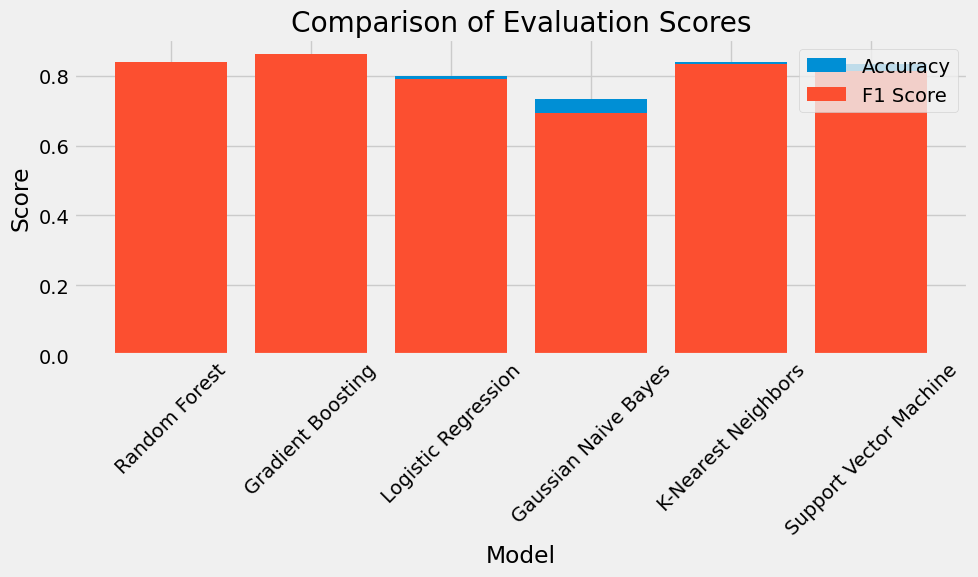

In [59]:
# Plot the evaluation scores
plt.figure(figsize=(10, 6))

# Plotting
plt.bar(model_results["Model"], model_results["Accuracy"], label="Accuracy")
plt.bar(model_results["Model"], model_results["F1 Score"], label="F1 Score")



plt.xlabel("Model")
plt.ylabel("Score")
plt.title("Comparison of Evaluation Scores")
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [60]:
# Determine the best model based on your criteria (e.g., highest F1 Score)

best_model = model_results[model_results["F1 Score"] == model_results["F1 Score"].max()]["Model"].iloc[0]
print("Best Model:", best_model)

Best Model: Gradient Boosting


### Check classification result for the best model

In [61]:
predictions = gb_model.predict(bank_test) 
print(classification_report(bank_y, predictions))

              precision    recall  f1-score   support

          no       0.87      0.84      0.86      3668
         yes       0.85      0.88      0.86      3668

    accuracy                           0.86      7336
   macro avg       0.86      0.86      0.86      7336
weighted avg       0.86      0.86      0.86      7336



It should be noted that with an accuracy of 86%, the model did pretty well. However, the model will be fine-tuned for a better performance

## HYPERPARAMETER TUNING FOR THE BEST MODEL

In [72]:
# Define the parameters for tuning

param = {
        'n_estimators': np.arange(50, 251, 50),
        'learning_rate': np.linspace(0.01, 0.2, 10),
        'max_depth': np.arange(3, 8),
        }


In [73]:
# Create a Gradient Boosting classifier instance

gb_classifier = GradientBoostingClassifier()

In [74]:
# Create RandomSearchCV instance with cross-validation

random_search = RandomizedSearchCV(estimator=gb_classifier, param_distributions=param, n_iter=10,cv=5, scoring='f1', 
                                   random_state=42, n_jobs=-1)


In [75]:
# Fit the RandomSearchCV on your training data

random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=GradientBoostingClassifier(), n_jobs=-1,
                   param_distributions={'learning_rate': array([0.01      , 0.03111111, 0.05222222, 0.07333333, 0.09444444,
       0.11555556, 0.13666667, 0.15777778, 0.17888889, 0.2       ]),
                                        'max_depth': array([3, 4, 5, 6, 7]),
                                        'n_estimators': array([ 50, 100, 150, 200, 250])},
                   random_state=42, scoring='f1')

In [77]:
# Get the best parameters and best model

best_params_random = random_search.best_params_
best_estimator_random = random_search.best_estimator_


In [78]:
# Print the best parameters
print("Best Parameters:", best_params_random)

# Print the best estimator
print("Best Estimator:", best_estimator_random)

Best Parameters: {'n_estimators': 150, 'max_depth': 6, 'learning_rate': 0.11555555555555555}
Best Estimator: GradientBoostingClassifier(learning_rate=0.11555555555555555, max_depth=6,
                           n_estimators=150)


In [79]:
# Make predictions on the test set using the tuned model

predictions = best_estimator_random.predict(bank_test)


In [80]:
# print classification report of tuned model

print(classification_report(bank_y, predictions)) 

              precision    recall  f1-score   support

          no       0.87      0.89      0.88      3668
         yes       0.89      0.87      0.88      3668

    accuracy                           0.88      7336
   macro avg       0.88      0.88      0.88      7336
weighted avg       0.88      0.88      0.88      7336



It can be seen that the model performance has improved from 86% accuracy under f1-score to 88% accuracy under f1-score. Also, the fine-tuned model performed better in precision and recall than the original model

In [97]:
# Save the tuned Gradient Boosting model to my local machine

save_path = r"D:\\Users\\elvis_d\\DATA_ANALYTICS\\GITHUB\\AZUBI AFRICA TMP ASSESSMENT\\AZUBI-AFRICA---TALENT-MOBILITY-PROGRAM-ASSESSMENT\\ASSETS\\src\\gb_model_tuned.joblib"

joblib.dump(best_estimator_random, "save_path")

['save_path']

In [96]:
save_path = r"D:\Projects\Capstone Churn prediction\ML folder\tuned_gb_model.joblib"